Q1. Write a Python code to implement the KNN classifier algorithm on load_iris dataset in
sklearn.datasets.

Answer:-

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
X,y = load_iris(return_X_y=True)

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=45)

In [5]:
classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9473684210526315


Q2. Write a Python code to implement the KNN regressor algorithm on load_boston dataset in
sklearn.datasets.

Answer:-

In [6]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
df.isna().sum()


,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [9]:
X = df.drop(labels=['medv'],axis=1)
Y = df['medv']

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2,random_state=42)

In [11]:
xtrain.shape, ytrain.shape

((404, 13), (404,))

In [12]:
xtest.shape, ytest.shape

((102, 13), (102,))

Implementing KNN Regressor Algorithm Base model

In [13]:
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors=5)

In [14]:
knnr.fit(xtrain,ytrain)


KNeighborsRegressor()

Please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.


In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knnr,xtrain,ytrain,cv=5,scoring='r2')
scores

array([0.54227727, 0.43905346, 0.35690125, 0.53955425, 0.4431922 ])

In [16]:
import numpy as np
cval_score = np.mean(scores)
print(f'Mean Cross Validation R2 Score is : {cval_score:.4f}')

Mean Cross Validation R2 Score is : 0.4642


Above model has very Low cross validation score hence need to tune this model

Hyperparameter tuning of model

In [17]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # number of neighbors to consider
    'weights': ['uniform', 'distance'],  # weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # algorithm used to compute nearest neighbors
    'p': [1, 2]  # power parameter for Minkowski distance metric
}

In [18]:
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(KNeighborsRegressor(),param_grid=param_grid,
                    cv=5, scoring='neg_mean_squared_error')

In [19]:
gscv.fit(xtrain,ytrain)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

Please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [20]:
gscv.best_params_


{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [21]:
gscv.best_score_


-33.2971448976826

In [22]:
ypred_test = gscv.predict(xtest)
ypred_test


array([24.73786364, 31.72249009, 15.3507154 , 27.30501395, 17.2018207 ,
       25.80550606, 19.77102868, 15.86582451, 19.94556132, 20.51957611,
       23.34136189, 19.56304115, 12.34755581, 21.52977457, 23.20852325,
       22.26416486, 19.81820761, 14.24896371, 35.11804765, 11.62004094,
       27.83111718, 31.06348918, 16.3713894 , 19.4077173 , 17.60615938,
       20.66688916, 23.21525052, 11.55758578, 22.57776747, 20.58288984,
       24.09667949, 22.46416373, 10.30494761, 31.44171256, 20.23677213,
       21.15529179, 23.81484376, 19.24104178, 22.3877953 , 27.40639917,
       20.18090339, 31.74240806, 39.07315304, 21.66989478, 24.86095688,
       12.07345738, 16.41442709, 27.53919149, 19.93014439, 22.67300676,
       22.39242834, 36.48125731, 17.49914887, 22.49907307, 38.70586535,
       21.08122549, 12.42356856, 36.2305086 , 22.40289116, 21.37946557,
       21.62040381, 38.67943081, 35.59528839, 15.93855689, 29.07592693,
       20.38622952, 11.82438563, 26.09728109, 34.24273893, 13.94

Evaluate model on test data


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(ytest, ypred_test)
mse = mean_squared_error(ytest,ypred_test)
rmse = mse**(1/2)
r2 = r2_score(ytest,ypred_test)

In [24]:
print(f'Testing MAE  : {mae:.2f}')
print(f'Testing MSE  : {mse:.2f}')
print(f'Testing RMSE : {rmse:.2f}')
print(f'Testing R2   : {r2:.4f}')

Testing MAE  : 3.27
Testing MSE  : 21.00
Testing RMSE : 4.58
Testing R2   : 0.7137


Q3. Write a Python code snippet to find the optimal value of K for the KNN classifier algorithm using
cross-validation on load_iris dataset in sklearn.datasets.

Answer:-

In [25]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

#load the iris dataset
X,y = load_iris(return_X_y=True)

#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=45)

# Create a list of K values to try
k_values = list(range(1, 25))

# Create an empty list to store cross-validation scores
cv_scores = []

# Iterate over each K value and perform cross-validation
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal K value with the highest cross-validation score
optimal_k = k_values[cv_scores.index(max(cv_scores))]

print(f"The optimal K value is {optimal_k} with a cross-validation accuracy of {max(cv_scores)}")

# Finally, you can train the KNN classifier with the optimal K on the full training set and evaluate it on the test set.
optimal_knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k)
optimal_knn_classifier.fit(X_train, y_train)
y_pred = optimal_knn_classifier.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

The optimal K value is 5 with a cross-validation accuracy of 0.9640316205533598
Accuracy: 0.9473684210526315


Observation :

With the optimal Value of k the accuracy of the model is increased from 94.73 to 96.40

Q4. Implement the KNN regressor algorithm with feature scaling on load_boston dataset in
sklearn.datasets.

Answer:-

In [26]:
from sklearn.neighbors import KNeighborsRegressor
# from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

#Since the load boston dataset is removed from sklearn we are using dataset url
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

#train test split
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.25,random_state=45)

#Standardization of numerical columns by using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Applying KNN regresssor
regressor = KNeighborsRegressor()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

#Checking the prediction r2 score of the model
print(f"R2 Score: {r2_score(y_test, y_pred)}")

R2 Score: 0.758193487336346


Observation :

After Scaling the R2 increased from 45.99 to 75.81

Q5. Write a Python code snippet to implement the KNN classifier algorithm with weighted voting on
load_iris dataset in sklearn.datasets.

Answer:-

Read Iris dataset


In [27]:
from sklearn.datasets import load_iris
X, Y = load_iris(return_X_y=True)

In [30]:
#Train Test Split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.33,random_state=42)

In [31]:
xtrain.shape, ytrain.shape


((100, 4), (100,))

In [32]:
xtest.shape, ytest.shape


((50, 4), (50,))

In [33]:
#Standard scaling xtrain and ytrain
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [34]:
#Implement KNNClassifier with weighted distance
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier(n_neighbors=5,weights='distance')
knnc.fit(xtrain,ytrain)

KNeighborsClassifier(weights='distance')

Please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knnc,xtrain,ytrain,cv=5, scoring='accuracy')
scores


array([1.  , 0.85, 0.9 , 1.  , 0.95])

In [36]:
import numpy as np
cval_score = np.mean(scores)
print(f'Mean Cross Validation Score for 5 fold cross validation is {cval_score:.4f}')


Mean Cross Validation Score for 5 fold cross validation is 0.9400


In [37]:
#Evaluating test data
ypred_test = knnc.predict(xtest)
ypred_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [38]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



Q6. Implement a function to standardise the features before applying KNN classifier.

Answer:-

In [43]:
# Creating a function to return model object and cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import numpy as np

def scale_and_predict_knn(X,Y,n=5,test_size=0.33,cv=5):
    # Train Test Split
    xtrain, xtest, ytrain, ytest = train_test_split(X,Y ,test_size=test_size,random_state=42)
    # Standard Scaling the data
    scaler = StandardScaler()
    xtrain = scaler.fit_transform(xtrain)
    xtest = scaler.transform(xtest)
    # KNN Base Classifier
    knnc = KNeighborsClassifier(n_neighbors=n)
    knnc.fit(xtrain,ytrain)
    # Cross Val Estimation
    scores = cross_val_score(knnc, xtrain, ytrain, cv=cv,scoring='accuracy')
    # Mean Cross Val Score
    cval_score_mean = np.mean(scores)
    # Test Data Classification Report
    ypred_test = knnc.predict(xtest)
    print('Classification Report on Test data :\n')
    print(classification_report(ytest, ypred_test))
    return xtrain, xtest, ytrain, ytest, knnc, cval_score_mean

In [44]:
# Load Cancer dataset
from sklearn.datasets import load_breast_cancer
X,Y = load_breast_cancer(return_X_y=True)

In [45]:
# Using the function to evaluate the data
xtrain, xtest, ytrain, ytest, knnc, cval_score_mean = scale_and_predict_knn(X,Y,n=5,test_size=0.2,cv=5)

Classification Report on Test data :

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [46]:
knnc

KNeighborsClassifier()

Please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [47]:
cval_score_mean


0.9604395604395606

<Axes: >

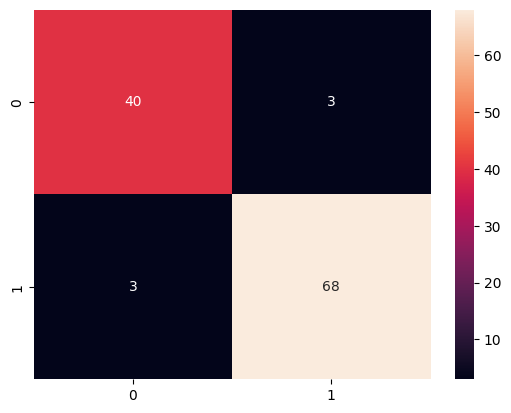

In [48]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(ytest,knnc.predict(xtest))
sns.heatmap(cf,annot=True,fmt='d')

Q7. Write a Python function to calculate the euclidean distance between two points.

Answer:-

In [51]:
import math

def euclidean_distance(point1, point2):
    """Calculate the Euclidean distance between two points in n-dimensional space."""
    dimensions = len(point1)
    squared_sum = 0
    for i in range(dimensions):
        squared_sum += (point1[i] - point2[i]) ** 2
    return math.sqrt(squared_sum)

In [52]:
# Using Function to calculate euclidean Distance
point1 = [1, 2, 3]
point2 = [4, 5, 6]
distance = euclidean_distance(point1, point2)
print(distance)

5.196152422706632


In [53]:
# Verifying distance manually for above points
a = (4-1)**2 + (5-2)**2 + (6-3)**2
a**0.5

5.196152422706632

Q8. Write a Python function to calculate the manhattan distance between two points.

Answer:-

In [54]:
def manhattan_distance(point1, point2):
    """Calculate the Manhattan distance between two points in n-dimensional space."""
    dimensions = len(point1)
    distance = 0
    for i in range(dimensions):
        distance += abs(point1[i] - point2[i])
    return distance

In [55]:
# Using function to calculate manhattan distance
point1 = [1, 2, 3]
point2 = [4, 5, 6]
distance = manhattan_distance(point1, point2)
print(distance)

9
